In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# not stationary
df1=pd.read_csv("D:\\Data\\airline_passengers.csv",index_col="Month",parse_dates=True)
df1.index.freq="MS"

# stationary
df2=pd.read_csv("D:\\！course-aalto\\analysis and data science\\TimeSeriesAnalysis\\code\\UDEMY_TSA_FINAL\\Data\\DailyTotalFemaleBirths.csv",index_col="Date",parse_dates=True)
df2.index.freq="D"

In [3]:
!pip install pmdarima

In [4]:
from pmdarima import auto_arima

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# help(auto_arima)

In [7]:
stepwise_fit=auto_arima(df2['Births'],start_p=0,start_q=0,max_p=6,max_q=3,seasonal=False,trace=True)

Performing stepwise search to minimize aic
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=2650.760, BIC=2658.555, Time=0.127 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=2565.234, BIC=2576.925, Time=0.107 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=2463.584, BIC=2475.275, Time=0.198 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=2648.768, BIC=2652.665, Time=0.020 seconds
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=2460.154, BIC=2475.743, Time=0.307 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=2461.271, BIC=2480.757, Time=0.349 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=2460.752, BIC=2480.238, Time=0.689 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=2460.722, BIC=2476.311, Time=0.244 seconds
Fit ARIMA: (2,

In [8]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.077
Date:                Fri, 20 Mar 2020   AIC                           2460.154
Time:                        20:26:54   BIC                           2475.743
Sample:                             0   HQIC                          2466.350
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0132      0.014      0.975      0.330      -0.013       0.040
ar.L1          0.1299      0.059      2.217      0.027       0.015       0.245
ma.L1         -0.9694      0.016    -62.235      0.000      -1.000      -0.939
sigma2        48.9989      3.432     14.279      0.000      42.273      55.725
===================================================================================
Ljung-Box (Q):                       36.69   Jarque-Bera (JB):                26.17
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.58
Prob(H) (two-sided):                  0.85   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
stepwise_fit=auto_arima(df1['Thousands of Passengers'],start_p=0,start_q=0,max_p=4,max_q=4,seasonal=True,trace=True,m=12)

Performing stepwise search to minimize aic
Fit ARIMA: (0, 1, 0)x(1, 1, 1, 12) (constant=True); AIC=1034.075, BIC=1045.576, Time=0.630 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=1033.479, BIC=1039.229, Time=0.027 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 0, 12) (constant=True); AIC=1022.316, BIC=1033.817, Time=0.449 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=1022.904, BIC=1034.405, Time=0.445 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=False); AIC=1031.508, BIC=1034.383, Time=0.029 seconds
Fit ARIMA: (1, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=1022.343, BIC=1030.968, Time=0.198 seconds
Fit ARIMA: (1, 1, 0)x(2, 1, 0, 12) (constant=True); AIC=1021.137, BIC=1035.513, Time=1.374 seconds
Fit ARIMA: (1, 1, 0)x(2, 1, 1, 12) (constant=True); AIC=1017.167, BIC=1034.418, Time=4.325 seconds
Near non-invertible roots for order (1, 1, 0)(2, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit A

In [10]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -501.921
Date:                            Fri, 20 Mar 2020   AIC                           1015.841
Time:                                    20:27:23   BIC                           1033.093
Sample:                                         0   HQIC                          1022.851
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.033      0.010      0.992      -0.064       0.065
ma.L1         -0.4259      0.068     -6.221      0.000      -0.560      -0.292
ar.S.L12       0.6676      0.159      4.206      0.000       0.357       0.979
ar.S.L24       0.3309      0.095      3.467      0.001       0.144       0.518
ma.S.L12      -0.9745      1.245     -0.783      0.434      -3.414       1.465
sigma2       110.9833    115.168      0.964      0.335    -114.742     336.709
===================================================================================
Ljung-Box (Q):                       53.00   Jarque-Bera (JB):                 7.41
Prob(Q):                              0.08   Prob(JB):                         0.02
Heteroskedasticity (H):               2.82   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# ARMA and ARIMA- AutoRegressive Integrated Moving Average

In [11]:
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults

In [12]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [13]:
from pmdarima import auto_arima

In [14]:
df1=pd.read_csv('D:\\Data\\DailyTotalFemaleBirths.csv',index_col="Date",parse_dates=True)
df1.index.freq='D'
df1=df1[:120]

In [15]:
df2=pd.read_csv('D:\\Data\\TradeInventories.csv',index_col="Date",parse_dates=True)
df2.index.freq="MS"

# ARMA

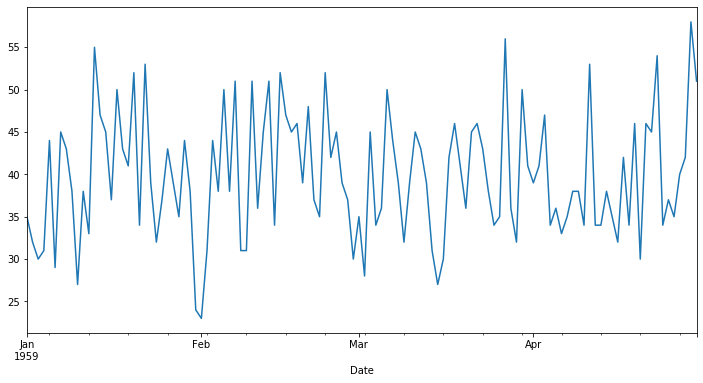

In [16]:
df1['Births'].plot(figsize=(12,6))

In [17]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [18]:
adf_test(df1['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [19]:
auto_arima(df1['Births'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Fri, 20 Mar 2020   AIC                            823.489
Time:                        20:27:25   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (Q):                       44.41   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.29   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
train=df1.iloc[:90]
test=df1.iloc[90:]

In [21]:
model=ARMA(train['Births'],order=(2,2))
results=model.fit()

In [22]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Fri, 20 Mar 2020   AIC                            627.809
Time:                        20:27:26   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.607      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.500      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.800      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.556      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7434           +0.0000j            1.7434            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

In [23]:
start=len(train)
end=len(train)+len(test)-1

In [24]:
predictions=results.predict(start,end).rename('ARMA (2,2) Predictions')

In [25]:
len(test)

30

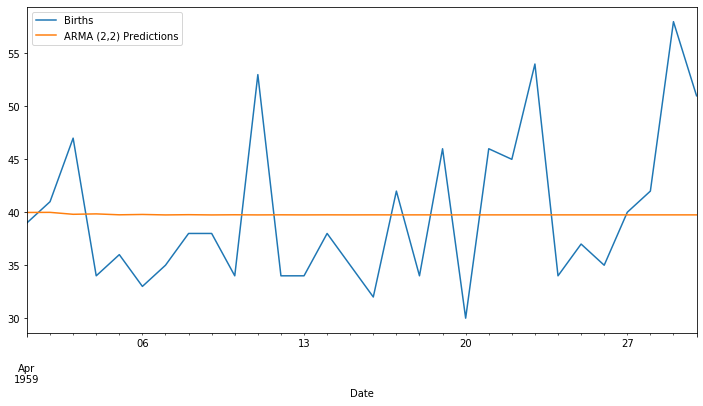

In [26]:
test['Births'].plot(figsize=(12,6),legend=True)
predictions.plot(legend=True)

In [27]:
test.mean()

Births    39.833333
dtype: float64

In [28]:
predictions.mean()

39.777430277482516

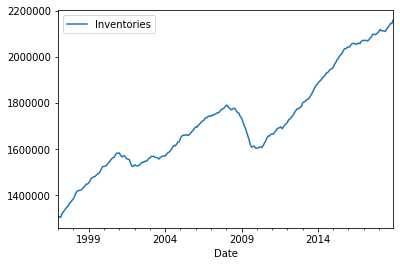

In [29]:
df2.plot()

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

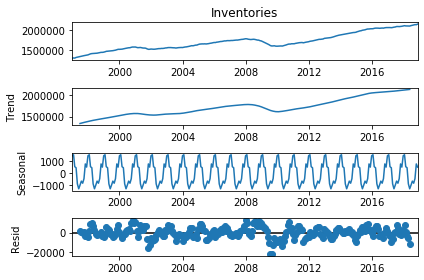

In [31]:
result=seasonal_decompose(df2['Inventories'],model='add')
result.plot();

In [32]:
df2.columns

Index(['Inventories'], dtype='object')

In [33]:
auto_arima(df2['Inventories'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Fri, 20 Mar 2020   AIC                           5348.037
Time:                        20:27:31   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (Q):                      455.75   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
from statsmodels.tsa.statespace.tools import diff

In [35]:
df2['Diff_1']=diff(df2['Inventories'],k_diff=1)

In [36]:
adf_test(df2['Diff_1'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


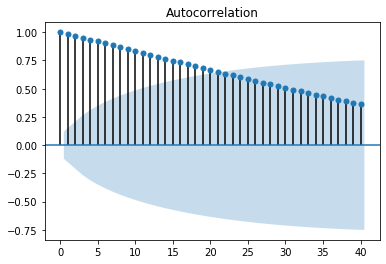

In [37]:
plot_acf(df2['Inventories'],lags=40);

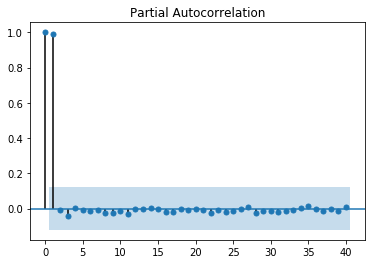

In [38]:
plot_pacf(df2['Inventories'],lags=40);

In [39]:
adf_test(df2['Diff_1'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [40]:
# AR=1
# I = 1
# MA=0 or 1 less error

In [41]:
stepwise_fit=auto_arima(df2['Inventories'],start_p=0,start_q=0,max_p=2,max_q=2,seasonal=False,trace=True)

Performing stepwise search to minimize aic
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=5348.037, BIC=5355.181, Time=0.030 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=5399.843, BIC=5410.560, Time=0.126 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=5350.241, BIC=5360.957, Time=0.083 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=5409.217, BIC=5412.789, Time=0.024 seconds
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=5378.835, BIC=5393.124, Time=0.254 seconds
Total fit time: 0.538 seconds


In [43]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Fri, 20 Mar 2020   AIC                           5348.037
Time:                        20:27:33   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (Q):                      455.75   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
len(df2)

264

In [45]:
train=df2.iloc[:252]
test=df2.iloc[252:]

In [46]:
model=ARIMA(train['Inventories'],order=(1,1,1))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2486.394
Method:                       css-mle   S.D. of innovations           4845.004
Date:                Fri, 20 Mar 2020   AIC                           4980.788
Time:                        20:32:05   BIC                           4994.889
Sample:                    02-01-1997   HQIC                          4986.463
                         - 12-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3244.6344   1345.033      2.412      0.016     608.418    5880.851
ar.L1.D.Inventories     0.9026      0.039     23.012      0.000       0.826       0.979
ma.L1.D.Inventories    -0.5581      0.079     -7.048      0.000      -0.713      -0.403
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1079           +0.0000j            1.1079            0.0000
MA.1            1.7917           +0.0000j            1.7917            0.0000
-----------------------------------------------------------------------------
"""

In [48]:
start=len(train)
end=len(train)+len(test)-1
predictions=results.predict(start=start,end=end,typ='levels').rename("ARIMA(1,1,1) Predictions")

In [49]:
predictions

2018-01-01    2.107159e+06
2018-02-01    2.110550e+06
2018-03-01    2.113928e+06
2018-04-01    2.117292e+06
2018-05-01    2.120645e+06
2018-06-01    2.123988e+06
2018-07-01    2.127320e+06
2018-08-01    2.130645e+06
2018-09-01    2.133961e+06
2018-10-01    2.137270e+06
2018-11-01    2.140574e+06
2018-12-01    2.143871e+06
Freq: MS, Name: ARIMA(1,1,1) Predictions, dtype: float64

In [50]:
test

,Inventories,Diff_1
Date,,
2018-01-01,2110158,6407.0
2018-02-01,2118199,8041.0
2018-03-01,2112427,-5772.0
2018-04-01,2112276,-151.0
2018-05-01,2111835,-441.0
2018-06-01,2109298,-2537.0
2018-07-01,2119618,10320.0
2018-08-01,2127170,7552.0
2018-09-01,2134172,7002.0


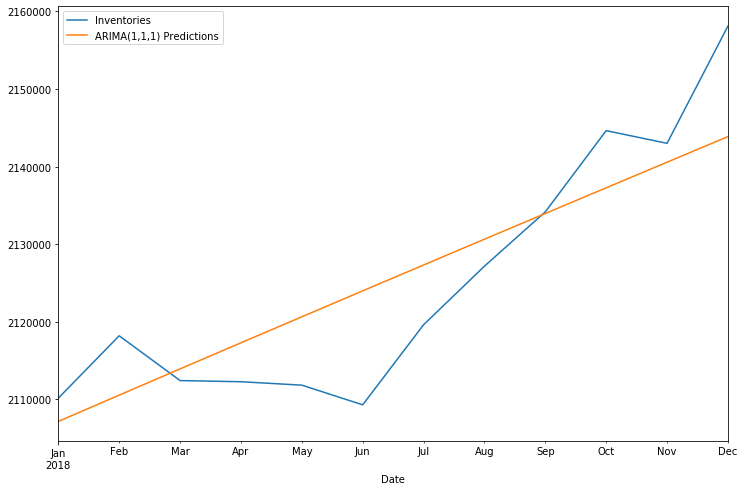

In [51]:
test['Inventories'].plot(legend=True,figsize=(12,8))
predictions.plot(legend=True)

In [53]:
from statsmodels.tools.eval_measures import rmse

In [54]:
error=rmse(test['Inventories'],predictions)

In [55]:
error

7761.236748246942

In [56]:
test['Inventories'].mean()

2125075.6666666665

# forcast into unknown future

In [58]:
model=ARIMA(df2["Inventories"],order=(1,1,1))

In [59]:
results=model.fit()

In [60]:
fcast=results.predict(start=len(df2),end=len(df2)+11,typ='levels').rename("ARIMA(1,1,1)Forcast")

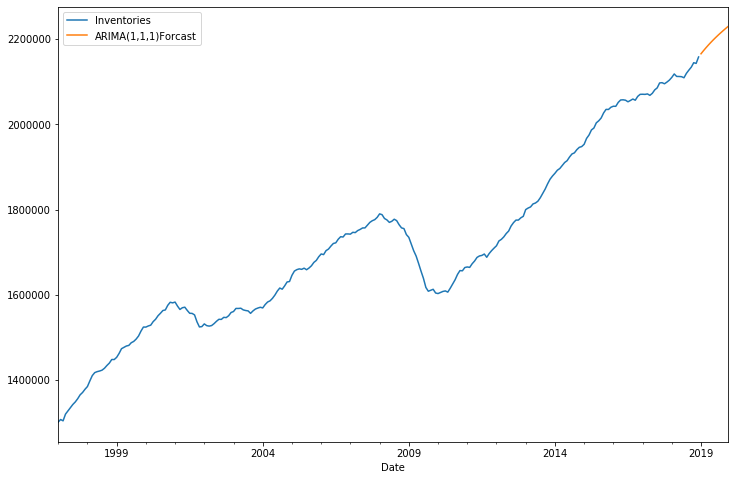

In [61]:
df2['Inventories'].plot(legend=True,figsize=(12,8))
fcast.plot(legend=True)